# Predicting Heart Disease with a Classification Model

# Introduction: 

Heart disease describes multiple conditions that affect the structure and function of the heart. These can lead to fatal heart attacks, so must be treated seriously. In this project, we will analyze past data of patients to try to predict heart disease in a person, with the person’s given medical records.

Our data set comes from the “Heart Disease Data Set” from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. This data set has attributes of patients including (but not limited to) age, sex, chest pain type, chest pain location, and smoking history. Furthermore, it includes both patients who have heart disease and patients who do not; the prescence of heart disease in a patient is indicated in the data as well. This way, we can use a classification model to help us predict the presence of heart disease for a person. This data set has four different databases from four locations (Cleveland, Hungary, Switzerland, and the VA Long Beach), but we will be focusing on the Cleveland data set, because it has a processed data set with only 14 attributes instead of 76 like the others, which makes it simpler when deciding which predictors we are using.



# Preliminary exploratory data analysis: 

In [1]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10) #This can only show 10 rows of the dataframe.



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names= FALSE)
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "disease_type")
cleveland_data <- mutate(cleveland_data, disease_type = as_factor(disease_type))
cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


### Cleaning the data by using filter() functions:
We can see that there are "?" in the *ca* column and missing values in the *thal* column. Our first step is to filter out the missing rows and "?" data.

In [3]:
filter_cleveland_data <- cleveland_data |>
    filter(thal != "?", ca != "?") |>
    drop_na()



In order to make a valid prediction, we need to ensure this data frame has a good balance between patients with heart disease and people without heart disease. We decided to make a plot to visualize it. By observing the *disease_type*, we see that there are 4 values (1-4) for presence of heart disease and 1 value (0) that represents a patient not having heart disease. Therefore, we start by mutating this column into a true/false of whether this patient has heart disease or not. We use a "ifelse" function to ask the question if the person has heart disease or not.

In [4]:
new_cleveland_data <- filter_cleveland_data |> mutate(have_heart_disease = ifelse(disease_type == 0, "No", "Yes"))
new_cleveland_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease_type,have_heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,No
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Yes
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,No
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1,Yes
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,Yes
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,Yes


Now we split our data into 2 sets, training set and testing set.

In [5]:
# Set the seed.
set.seed(3456) 

# Split the data into 75% and 25%.
data_split <- initial_split(new_cleveland_data, prop = 0.75, strata = have_heart_disease)  

heart_train_set <- training(data_split)   
heart_test_set <- testing(data_split)

To properly analyze how accurate our predictions our, we first have to understand the proportion of patients with/without heart disease. This way, we can better understand how accurate we were based on the predictors with the classification model and not due to random distribution of the data.

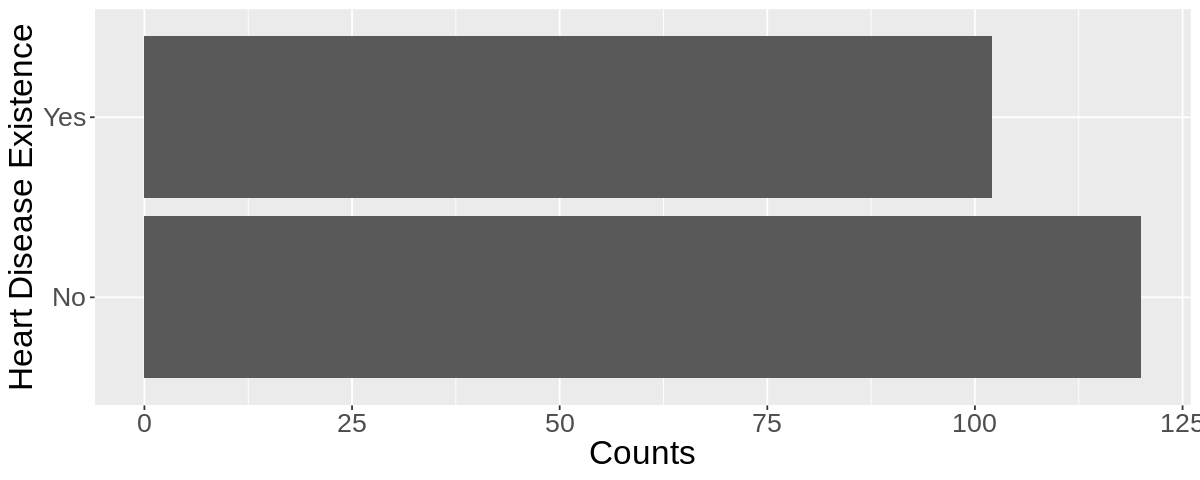

In [6]:
options(repr.plot.width = 10, repr.plot.height = 4)

counting_types <- heart_train_set |>
    group_by(have_heart_disease)|>
    summarize(types_count = n()) 

exsitance_plot<- counting_types |>
ggplot(aes( x = have_heart_disease,
            y = types_count)) +
    geom_bar(position='stack', stat='identity') +
    scale_fill_manual(values=c('red', 'purple'))+
    coord_flip() +
    labs(x = "Heart Disease Existence", y = "Counts") +
    theme(text = element_text(size = 20))
exsitance_plot


# Methods: 

Of the 14 variables in the data (13 excluding the target variable), some are related, and some influence heart disease more than others. Researching which attributes affect heart disease more, we decided on the following predictors:
- age
- sex
- thalach: maximum heart rate achieved (bpm)
- exang: exercise-induced angina (1 = yes; 0 = no)
- oldpeak: ST depression
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: thalassemia
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect


Now we will make a few plots to explore how our predictors affect the target variable. These can be used to form hypotheses and check if the results match with what was predicted.

`geom_smooth()` using formula 'y ~ x'



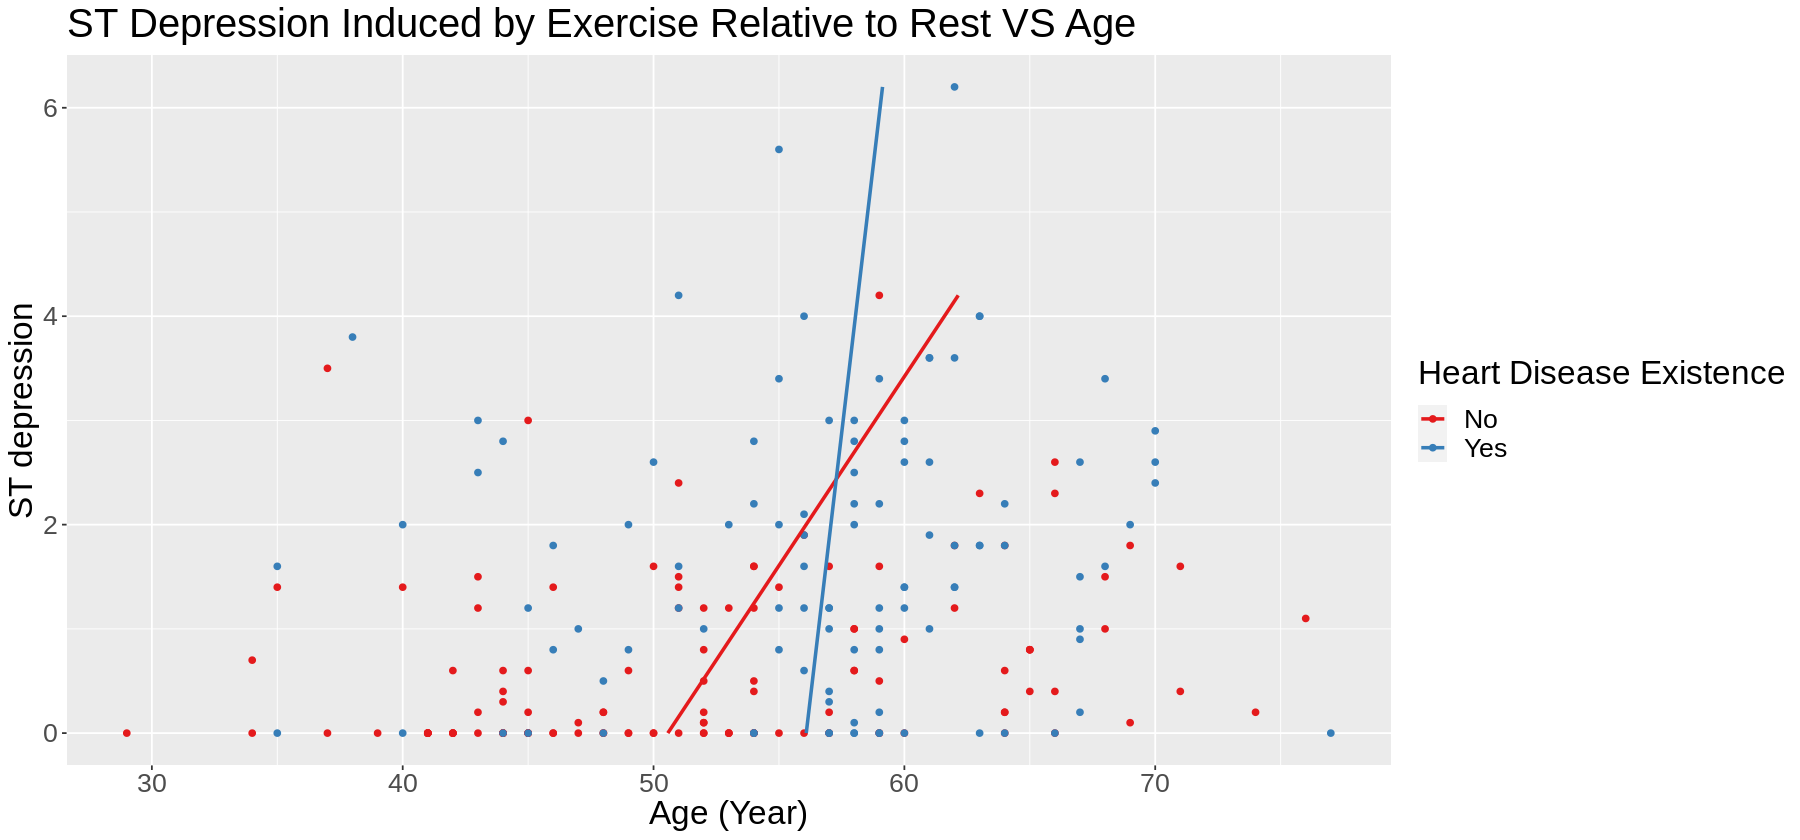

In [7]:
options(repr.plot.width = 15, repr.plot.height = 7)

oldpeak_vs_age<- heart_train_set |>
ggplot(aes( x = oldpeak,
            y = age, color= have_heart_disease)) +
    geom_point(stat = 'identity') +
    coord_flip() +
    labs(x = "ST depression", y = "Age (Year)", color = "Heart Disease Existence") +
    theme(text = element_text(size = 20)) +
    geom_smooth(method=lm,se=FALSE)+
    scale_color_brewer(palette="Set1")+
    ggtitle("ST Depression Induced by Exercise Relative to Rest VS Age")
oldpeak_vs_age

In this first plot above, there is a tendency of higher heart disease presence with higher age and higher ST depression.

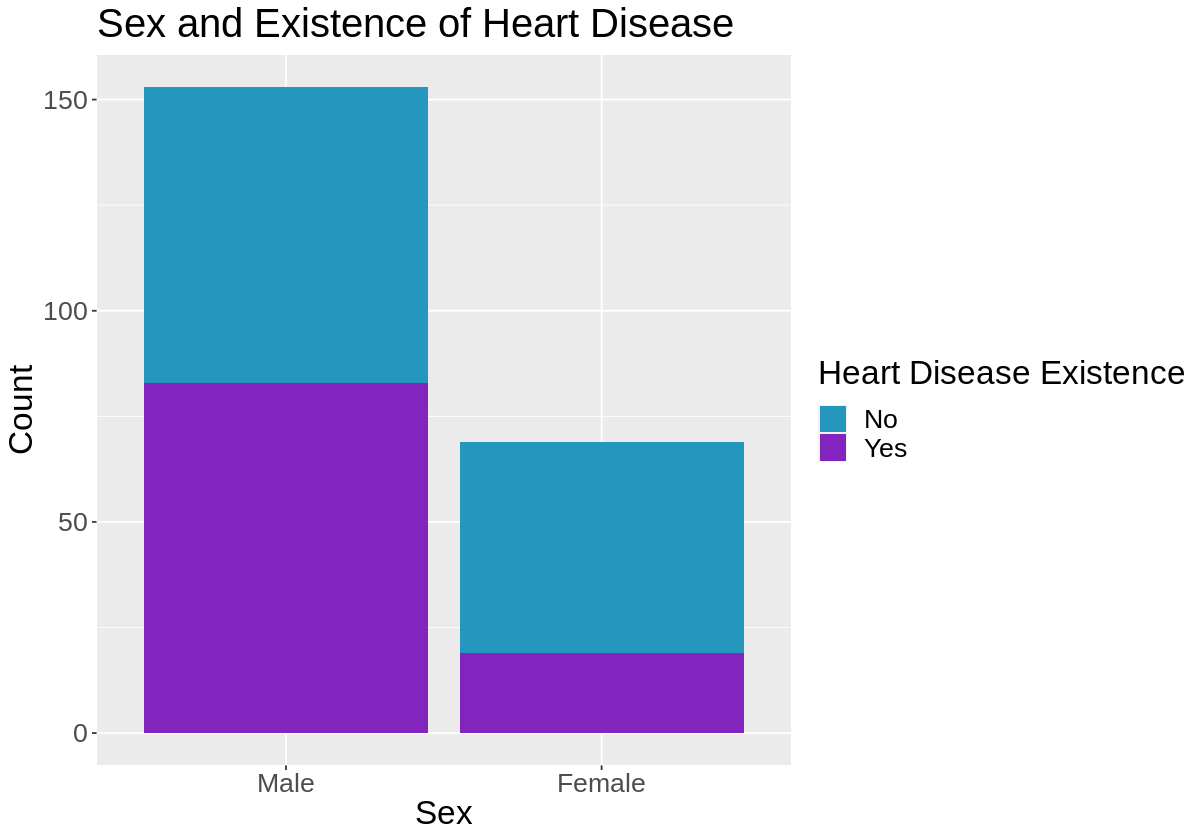

In [8]:
options(repr.plot.width = 10, repr.plot.height = 7)



sex_plot<- heart_train_set |>
    mutate(sex = ifelse(sex == 0, "Female", "Male")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex, fill = have_heart_disease)) +
    geom_bar() +
    scale_fill_manual(values=c('#2596BE', '#8225BE')) +
    labs(x = "Sex", y = "Count", fill = "Heart Disease Existence") +
    theme(text = element_text(size = 20))+
    ggtitle("Sex and Existence of Heart Disease")
sex_plot

Heart disease is more apparent in males.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



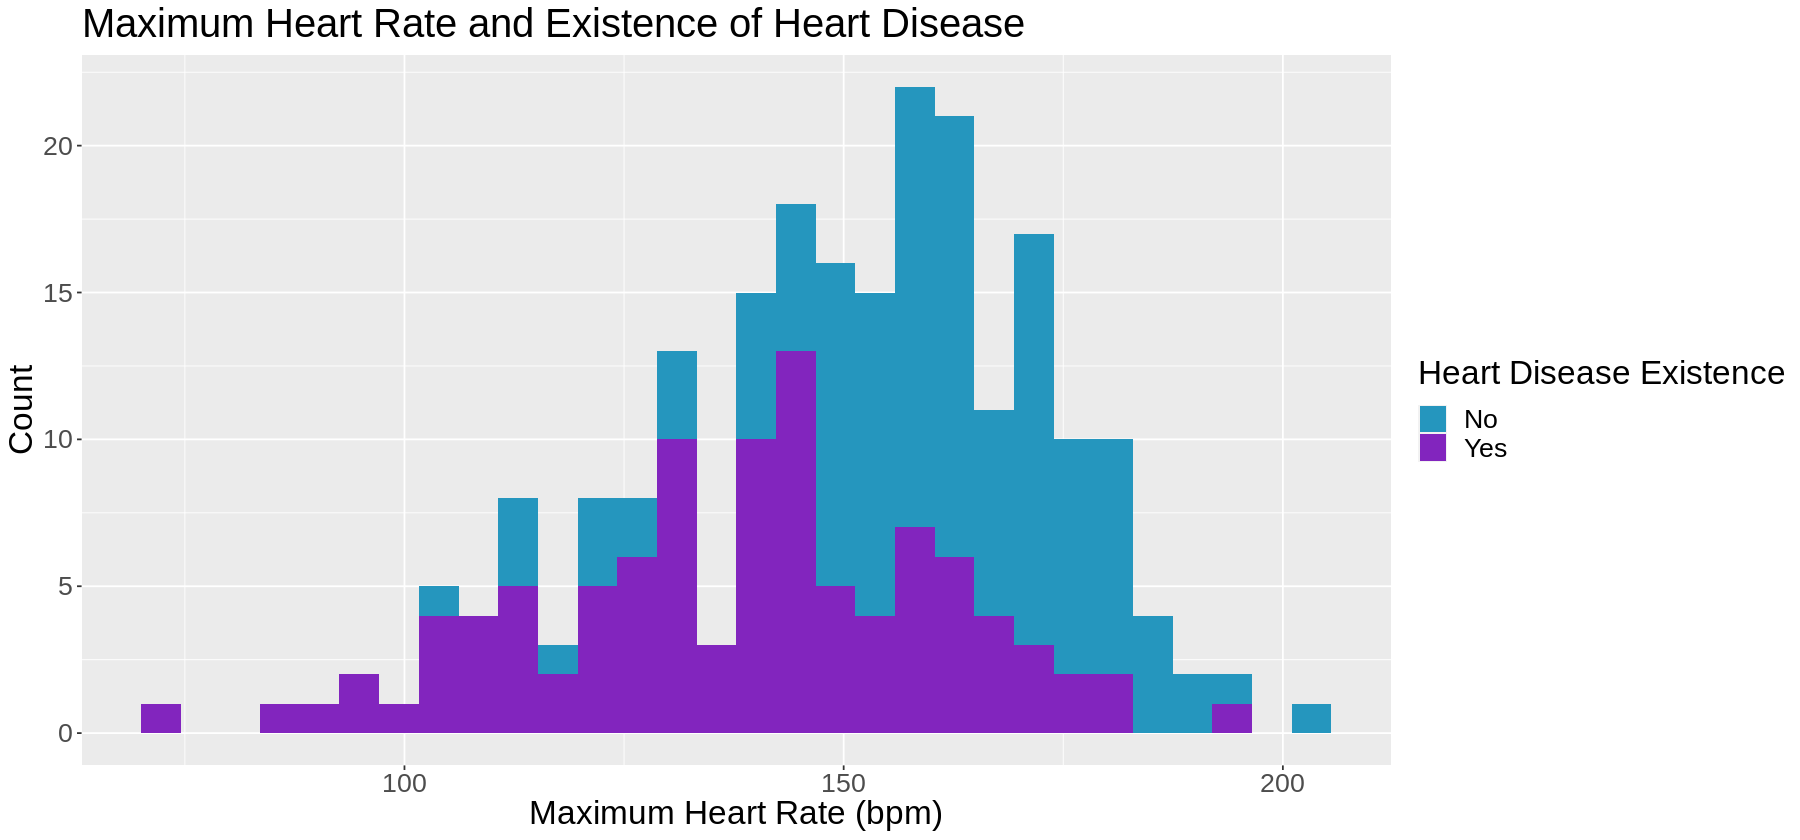

In [9]:
options(repr.plot.width = 15, repr.plot.height = 7)

thalach_plot<- heart_train_set |>
ggplot(aes(x = thalach,fill = have_heart_disease)) +
    geom_histogram() +
    scale_fill_manual(values=c('#2596BE', '#8225BE')) +
    labs(x = "Maximum Heart Rate (bpm)", y = "Count", fill = "Heart Disease Existence") +
    theme(text = element_text(size = 20))+
    ggtitle("Maximum Heart Rate and Existence of Heart Disease")
thalach_plot

Heart rates on the lower end are more associated with having heart disease.

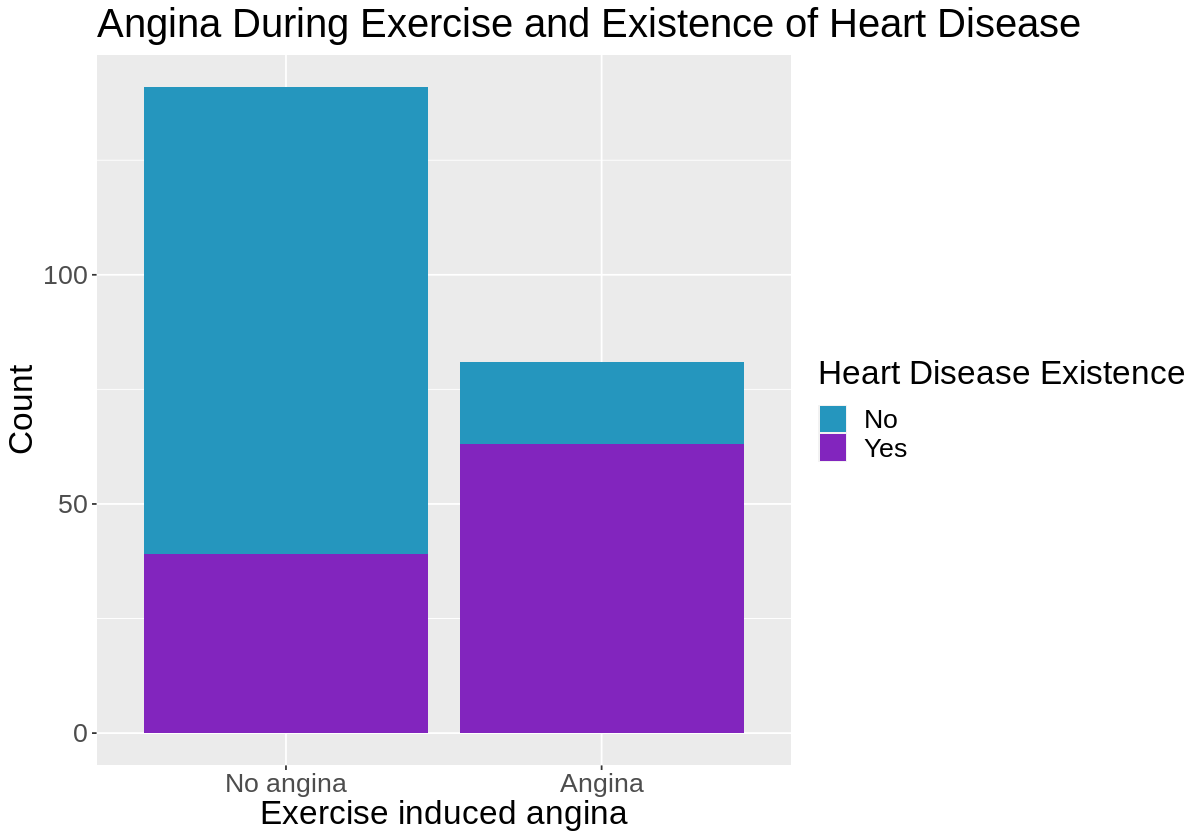

In [10]:
options(repr.plot.width = 10, repr.plot.height = 7)

exang_plot<- heart_train_set |>
    mutate(exang = ifelse(exang == 0, "No angina", "Angina")) |>
    mutate(exang = as_factor(exang)) |>
    ggplot(aes(x = exang, fill = have_heart_disease)) +
    geom_bar() +
    scale_fill_manual(values=c('#2596BE', '#8225BE')) +
    labs(x = "Exercise induced angina", y = "Count", fill = "Heart Disease Existence") +
    theme(text = element_text(size = 20))+
    ggtitle("Angina During Exercise and Existence of Heart Disease")
exang_plot

There is a higher proportion of heart disease of patients with exercise-induced angina.

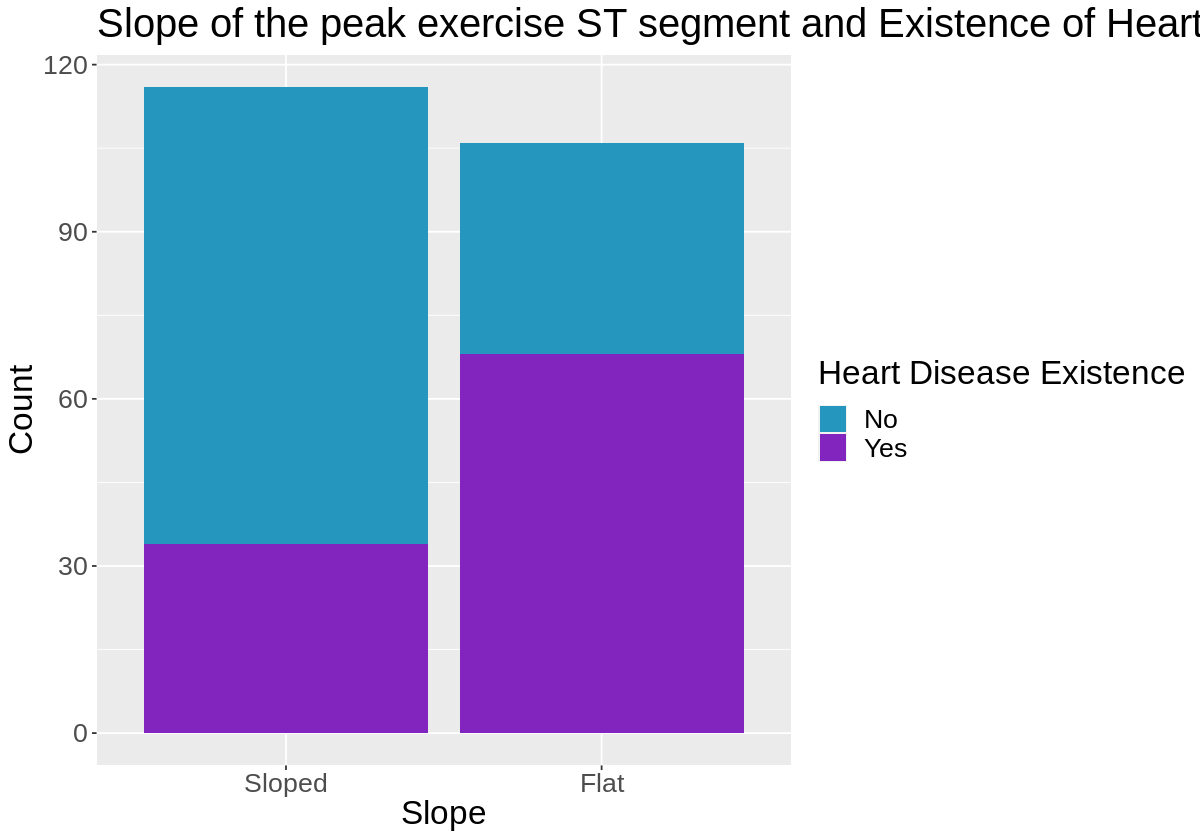

In [11]:
options(repr.plot.width = 10, repr.plot.height = 7)

slope_plot<- heart_train_set |>
     mutate(slope = ifelse(slope == 2, "Flat", "Sloped")) |>
    mutate(slope = as_factor(slope)) |>
    ggplot(aes(x = slope, fill = have_heart_disease)) +
    geom_bar() +
    scale_fill_manual(values=c('#2596BE', '#8225BE')) +
    labs(x = "Slope", y = "Count", fill = "Heart Disease Existence") +
    theme(text = element_text(size = 20))+
    ggtitle("Slope of the peak exercise ST segment and Existence of Heart Disease")
slope_plot

Having a flat slope of the peak exercise ST segment of an electrocardiogram has a higher proportion of heart disease.

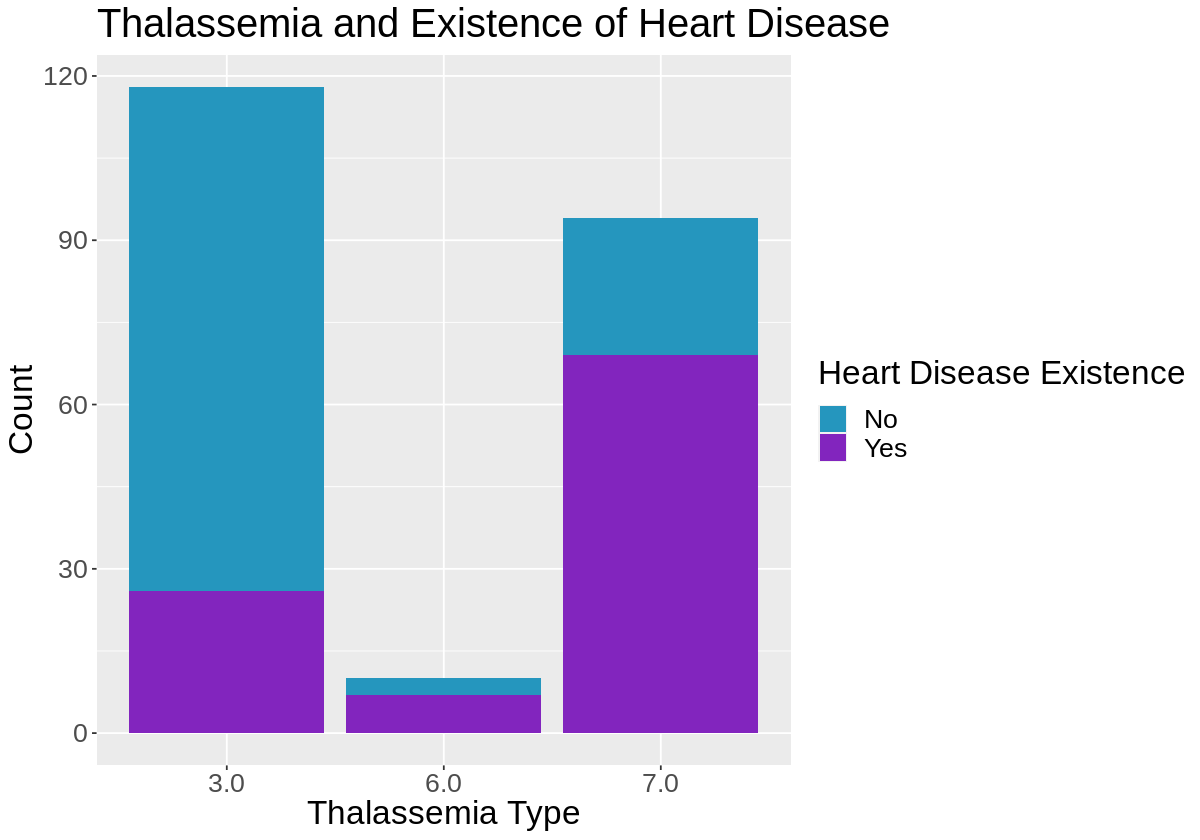

In [12]:
options(repr.plot.width = 10, repr.plot.height = 7)

thal_plot<- heart_train_set |>
    ggplot(aes(x = thal, fill = have_heart_disease)) +
    geom_bar() +
    scale_fill_manual(values=c('#2596BE', '#8225BE')) +
    labs(x = "Thalassemia Type", y = "Count", fill = "Heart Disease Existence") +
    theme(text = element_text(size = 20))+
    ggtitle("Thalassemia and Existence of Heart Disease")
thal_plot

A reversible defect of thalassemia has the highest relative presence of heart disease.

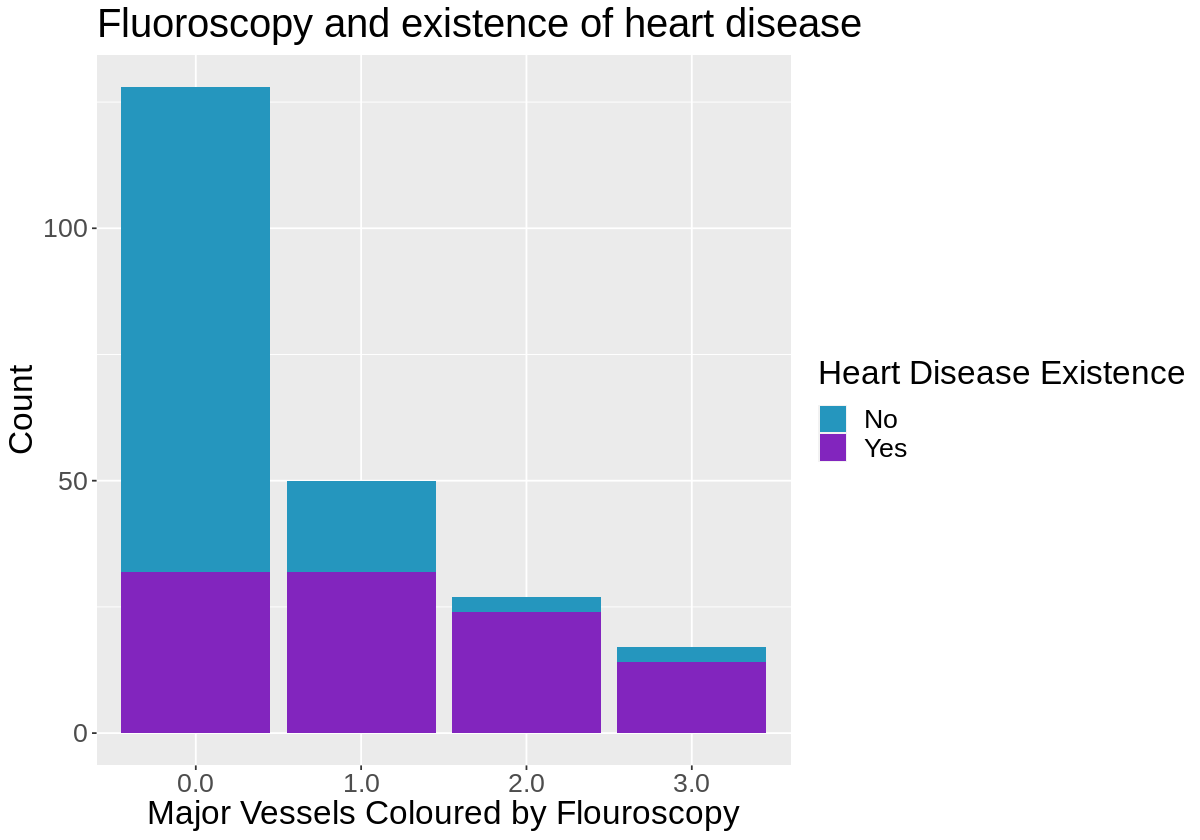

In [13]:
options(repr.plot.width = 10, repr.plot.height = 7)

ca_plot<- heart_train_set |>
    ggplot(aes(x = ca, fill = have_heart_disease)) +
    geom_bar() +
    scale_fill_manual(values=c('#2596BE', '#8225BE')) +
    labs(x = "Major Vessels Coloured by Flouroscopy", y = "Count", fill = "Heart Disease Existence") +
    theme(text = element_text(size = 20))+
    ggtitle("Fluoroscopy and existence of heart disease")
ca_plot

More major vessels coloured by fluoroscopy leads to higher proportions of heart disease.

# Expected outcomes and significance:

## What do you expect to find?
Firstly, we expect to find a relation between presence of heart disease and our eight predictors,
Because we have selected the variables through manual research, we want to double check by plotting these predictors, we expect to find a strong relation between these.
Then We expect to predict the likelihood of presence of heart disease in a person by fitting these 8 attributes of a person into our model. We expect to predict the presence of heart disease with good accuracy.

## What impact could such findings have? 
As heart disease can lead to heart attacks that can take lives, these findings could help us  identify the disease and prevent it before it becomes too dangerous. 
Early identifications of heart disease will help patients save medical costs.



## What future questions could this lead to?
Can we predict the type of heart disease from this data?

This could consequently cause a lot of unhealthy people to question their lifestyle decisions.
How well does the classification model behave with other populations?

How insights from our model can be used to develop heart disease prevention strategies?
What attributes were the strongest predictor of heart disease?
